In [1]:
import os, sys
import esutil
import healpy as hp
import numpy as np
import fitsio
sys.path.append('../')
from xd import *
from run_DMASS_Y3 import *
from utils import *
import healpy as hp
from systematics import *
from cmass_modules import io
os.chdir('../../DMASS_XDGMM/code_py3/')
print(os.getcwd())
from xdgmm import XDGMM as XDGMM_Holoien
os.chdir('../../DMASSY3/code_py3/')
print(os.getcwd())

In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /users/PCON0003/warner785/.conda/envs/DES_env/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


/users/PCON0003/warner785/DMASS_XDGMM/code_py3
/users/PCON0003/warner785/DMASSY3/code_py3


In [2]:
#load in dmass model:
clf_200 = XDGMM_Holoien(filename='output/test/fitting/gauss_gold_bovyY3_200DET_unfixed.xdgmm')
clf_no200 = XDGMM_Holoien(filename='output/test/fitting/gauss_nogold_bovyY3_200DET_unfixed.xdgmm')

In [2]:
#loading in all of y3 gold:

input_path = '/fs/scratch/PCON0008/warner785/bwarner/'
input_keyword = 'full_spt_'
columns =  ['RA', 'DEC', 
            'HPIX_4096',     # Healpix in ring order, nside=4096
            'COADD_OBJECT_ID', 
            'SOF_CM_MAG_CORRECTED_G', # mag_[griz]
            'SOF_CM_MAG_CORRECTED_R',
            'SOF_CM_MAG_CORRECTED_I',
            'SOF_CM_MAG_CORRECTED_Z',
            'SOF_CM_MAG_ERR_G',       # mag error_[griz]
            'SOF_CM_MAG_ERR_R',
            'SOF_CM_MAG_ERR_I',
            'SOF_CM_MAG_ERR_Z', 'EXTENDED_CLASS_MASH_SOF', 'MAG_DETMODEL_G', 'MAG_DETMODEL_R', 'MAG_DETMODEL_I', 'MAG_DETMODEL_Z', 
            'MAGERR_DETMODEL_G', 'MAGERR_DETMODEL_R', 'MAGERR_DETMODEL_I', 'MAGERR_DETMODEL_Z']
gold = io.SearchAndCallFits(path = input_path, keyword = input_keyword, columns=columns)


Calling catalogs >>>
full_spt_000034.fits
full_spt_000001.fits
full_spt_000032.fits
full_spt_000027.fits
full_spt_000022.fits
full_spt_000025.fits
full_spt_000005.fits
full_spt_000021.fits
full_spt_000010.fits
full_spt_000012.fits
full_spt_000004.fits
full_spt_000033.fits
full_spt_000016.fits
full_spt_000013.fits
full_spt_000024.fits
full_spt_000006.fits
full_spt_000031.fits
full_spt_000015.fits
full_spt_000020.fits
full_spt_000002.fits
full_spt_000026.fits
full_spt_000017.fits
full_spt_000011.fits
full_spt_000008.fits
full_spt_000029.fits
full_spt_000028.fits
full_spt_000023.fits
full_spt_000014.fits
full_spt_000019.fits
full_spt_000007.fits
full_spt_000003.fits
full_spt_000030.fits
full_spt_000018.fits
full_spt_000009.fits
reading 1/34 /fs/scratch/PCON0008/warner785/bwarner/full_spt_000034.fits
reading 2/34 /fs/scratch/PCON0008/warner785/bwarner/full_spt_000001.fits
reading 3/34 /fs/scratch/PCON0008/warner785/bwarner/full_spt_000032.fits
reading 4/34 /fs/scratch/PCON0008/warner785/b

In [3]:
# Apply the same color/mag cuts to exclude extreme color/mag sources //
mask_magcut = priorCut_test(gold)
gold = gold[mask_magcut]

gold = gold[(gold['EXTENDED_CLASS_MASH_SOF'] == 3)]
        
print(gold.size)

40932019


In [3]:
# Call in st82 region to take out this portion of the gold catalog:

# Calling Y3 GOLD v2.0 (training)
# All catalogs are in the 'input_path' directory 
# The 'SearchAndCallFits' function below loads all 
# catalogs in the directory including 'input_keyword' in its name
#input_path = '/n/des/lee.5922/data/gold_cat_Y3/STRIPE82/feae9705305d4430993687930f1cc3ad/'
input_path = '/fs/scratch/PCON0003/warner785/bwarner/'
# call only first 9 catalogs for a fast run.
# to call all catalogs in the directory, use 'Y3_GOLD' as input_keyword 
# but that will consume huge memory
input_keyword = 'Y3_GOLD_2_0_STRIPE82'  
# Columns to call
columns =  ['RA', 'DEC', 
            'HPIX_4096',     # Healpix in ring order, nside=4096
            'COADD_OBJECT_ID', 
            'SOF_CM_MAG_CORRECTED_G', # mag_[griz]
            'SOF_CM_MAG_CORRECTED_R',
            'SOF_CM_MAG_CORRECTED_I',
            'SOF_CM_MAG_CORRECTED_Z',
            'SOF_CM_MAG_ERR_G',       # mag error_[griz]
            'SOF_CM_MAG_ERR_R',
            'SOF_CM_MAG_ERR_I',
            'SOF_CM_MAG_ERR_Z', 'EXTENDED_CLASS_MASH_SOF', 'MAG_DETMODEL_G', 'MAG_DETMODEL_R', 'MAG_DETMODEL_I', 'MAG_DETMODEL_Z', 
            'MAGERR_DETMODEL_G', 'MAGERR_DETMODEL_R', 'MAGERR_DETMODEL_I', 'MAGERR_DETMODEL_Z']
gold_st82 = io.SearchAndCallFits(path = input_path, keyword = input_keyword, columns=columns)

# Color/Magnitude cuts to exclude extremely high or low mag/color sources.
# 16 < mag_riz < 24, 0 < (r-i) < 1.5, 0 < (g-r) < 2.5
# These galaxies are less likeliy to be a CMASS, therefore unnecessary. 
# We apply these cuts to reduce the sample size to speed up the codes

'''
mask_magcut = priorCut_test(gold_st82)
gold_st82 = gold_st82[mask_magcut]
gold_st82 = gold_st82[(gold_st82['EXTENDED_CLASS_MASH_SOF'] == 3)]
'''


Calling catalogs >>>
Y3_GOLD_2_0_STRIPE82_000125.fits
Y3_GOLD_2_0_STRIPE82_000136.fits
Y3_GOLD_2_0_STRIPE82_000040.fits
Y3_GOLD_2_0_STRIPE82_000015.fits
Y3_GOLD_2_0_STRIPE82_000086.fits
Y3_GOLD_2_0_STRIPE82_000047.fits
Y3_GOLD_2_0_STRIPE82_000108.fits
Y3_GOLD_2_0_STRIPE82_000079.fits
Y3_GOLD_2_0_STRIPE82_000076.fits
Y3_GOLD_2_0_STRIPE82_000057.fits
Y3_GOLD_2_0_STRIPE82_000111.fits
Y3_GOLD_2_0_STRIPE82_000084.fits
Y3_GOLD_2_0_STRIPE82_000088.fits
Y3_GOLD_2_0_STRIPE82_000049.fits
Y3_GOLD_2_0_STRIPE82_000063.fits
Y3_GOLD_2_0_STRIPE82_000070.fits
Y3_GOLD_2_0_STRIPE82_000077.fits
Y3_GOLD_2_0_STRIPE82_000042.fits
Y3_GOLD_2_0_STRIPE82_000118.fits
Y3_GOLD_2_0_STRIPE82_000115.fits
Y3_GOLD_2_0_STRIPE82_000028.fits
Y3_GOLD_2_0_STRIPE82_000140.fits
Y3_GOLD_2_0_STRIPE82_000060.fits
Y3_GOLD_2_0_STRIPE82_000089.fits
Y3_GOLD_2_0_STRIPE82_000143.fits
Y3_GOLD_2_0_STRIPE82_000012.fits
Y3_GOLD_2_0_STRIPE82_000001.fits
Y3_GOLD_2_0_STRIPE82_000045.fits
Y3_GOLD_2_0_STRIPE82_000137.fits
Y3_GOLD_2_0_STRIPE82_

"\nmask_magcut = priorCut_test(gold_st82)\ngold_st82 = gold_st82[mask_magcut]\ngold_st82 = gold_st82[(gold_st82['EXTENDED_CLASS_MASH_SOF'] == 3)]\n"

In [4]:
def keepGoodRegion(des, hpInd = False, balrog=None):
    import healpy as hp
    import fitsio
    # 25 is the faintest object detected by DES
    # objects larger than 25 considered as Noise
    
    path = '/fs/scratch/PCON0003/warner785/bwarner/'
    #LSSGoldmask = fitsio.read(path+'Y1LSSmask_v2_il22_seeil4.0_nside4096ring_redlimcut.fits')
    #LSSGoldmask = fitsio.read(path+'Y1LSSmask_v1_il22seeil4.04096ring_redlimcut.fits')
    LSSGoldmask = fitsio.read(path+'MASK_Y3LSSBAOSOF_22_3_v2p2.fits')
    ringhp = hp.nest2ring(4096, [LSSGoldmask['PIXEL']])
    #Y1LSSmask_v1_il22seeil4.04096ring_redlimcut.fits
    #frac_cut = LSSGoldmask['FRAC'] > 0.8
    #ind_good_ring = LSSGoldmask['PIXEL'][frac_cut]
    ind_good_ring = ringhp
    
    # healpixify the catalog.
    nside=4096
    # Convert silly ra/dec to silly HP angular coordinates.
    phi = des['RA'] * np.pi / 180.0
    theta = ( 90.0 - des['DEC'] ) * np.pi/180.0

    hpInd = hp.ang2pix(nside,theta,phi,nest=False)
    keep = np.in1d(hpInd, ind_good_ring)
    des = des[keep]
    if hpInd is True:
        return ind_good_ring
    else:
        return des

In [5]:
# apply the keepGoodRegion cut:

print(gold_st82.size)   
print(gold.size)
gold_st82 = keepGoodRegion(gold_st82)
gold = keepGoodRegion(gold)
print(gold_st82.size)
print(gold.size)

50401710
217547423
43548202
205742284


In [7]:
mask = (gold_st82['RA']>310) & (gold_st82['RA']<360)|(gold_st82['RA']<7)
mask = mask & (gold_st82['DEC']>-10) & (gold_st82['DEC']<10)
gold_st82_train = gold_st82[mask]

In [6]:
mask2 = (gold_st82['RA']>310) & (gold_st82['RA']<320)
mask2 = mask2 & (gold_st82['DEC']>-10) & (gold_st82['DEC']<10)
gold_st82_check = gold_st82[mask2]

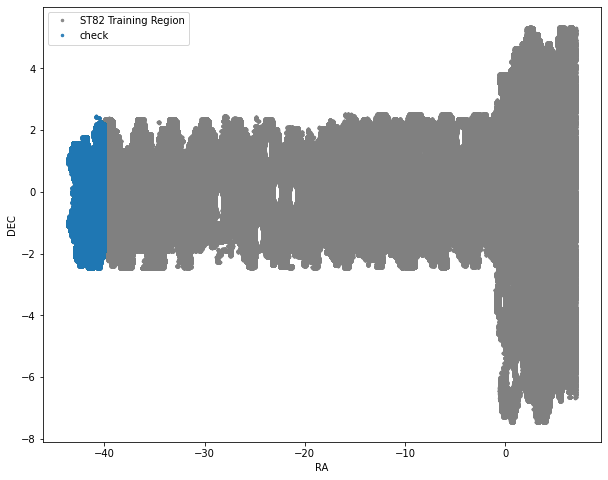

In [8]:
# checking footprint:
# add validation in different color
spatialcheck([gold_st82_train, gold_st82_check], 
             label = ['ST82 Training Region','check'], convert = None, ratag='RA',dectag='DEC')

In [9]:
mask3 = (gold['RA']>310) & (gold['RA']<320)
mask3 = mask3 & (gold['DEC']>-10) & (gold['DEC']<10)
gold_check = gold[mask3]

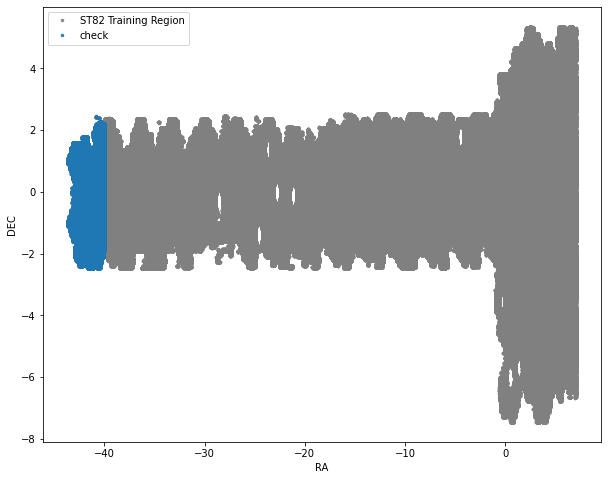

In [10]:
# checking footprint:
# add validation in different color
spatialcheck([gold_st82_train, gold_check], 
             label = ['ST82 Training Region','check'], convert = None, ratag='RA',dectag='DEC')

In [11]:
print(gold_check.size)
print(gold_st82_check.size)

# plot colors of missing obj

406936
852742


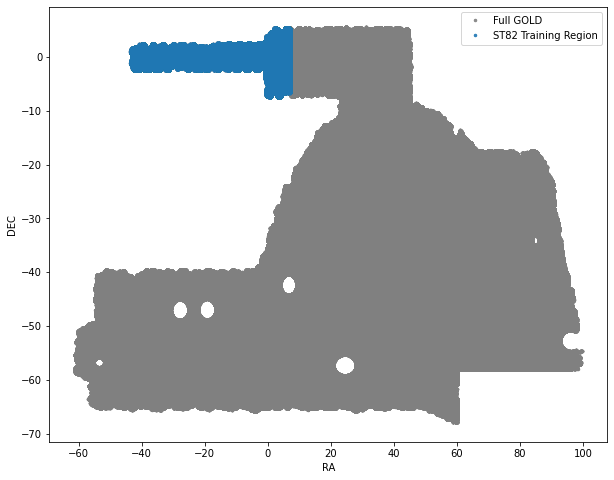

In [9]:
# checking footprint:
# add validation in different color
spatialcheck([gold, gold_st82_train], 
             label = ['Full GOLD', 'ST82 Training Region'], convert = None, ratag='RA',dectag='DEC')

In [13]:
# cutting away st82 region: --- making st82 region a mask
#squeue -A PCON0008 (to check how much space on OSC)

'''
print(gold.size)
print(gold_st82_train.size)
mg1, mg2, _ = esutil.htm.HTM(10).match(gold['COADD_OBJECT_ID'], gold_st82_train['COADD_OBJECT_ID'], \
                                         maxmatch=1)
st82_mask = np.zeros(gold.size, dtype=bool)
st82_mask[mg1] = 1
st82_data, spt_data = gold[st82_mask], gold[~st82_mask]

#clean_cmass_data_sdss = train_sample[mg1]           # common galaxies in cmass catalog
'''

"\nprint(gold.size)\nprint(gold_st82_train.size)\nmg1, mg2, _ = esutil.htm.HTM(10).match(gold['COADD_OBJECT_ID'], gold_st82_train['COADD_OBJECT_ID'],                                          maxmatch=1)\nst82_mask = np.zeros(gold.size, dtype=bool)\nst82_mask[mg1] = 1\nst82_data, spt_data = gold[st82_mask], gold[~st82_mask]\n\n#clean_cmass_data_sdss = train_sample[mg1]           # common galaxies in cmass catalog\n"

In [12]:
# check numpy.in1d function.
# This function compares array1 and array2, and then produces a mask for array1 
# to select components that exist in both arrays.

st82_mask = np.in1d(gold['COADD_OBJECT_ID'], gold_st82_train['COADD_OBJECT_ID'], assume_unique=False, invert=False)

gold_spt = gold[~st82_mask]
# produce two masks for each array, and then mask them to leave components in common, 
#then would sort them in order.

gold_st82_check = gold[st82_mask]

index_mask = np.argsort(gold_spt['HPIX_4096'])
gold_spt_chron = gold_spt[index_mask] # ordered by hpix values


print(gold_spt_chron.size)
print(gold_st82_check.size)

36306967
1854199


In [12]:
import numpy as np
import pandas as pd

# First catalog to be matched
#catdir = '/Users/amichoi/src/LEPHARE/ami_spherex_richardsims_shallow/'
#file1 = open('%s/sedcat_df_1000_2000_obsf_306sphxfilts_gama.csv' %catdir)
#data1 = np.loadtxt(file1, delimiter=',',skiprows=1)
#file1.close()
tractor_id = gold['COADD_OBJECT_ID'].copy()

# Load second catalog into pandas dataframe
from astropy.table import Table
df = pd.DataFrame(gold_st82_train)
#df = gold_st82_train.to_pandas()

tractor_id2 = df['COADD_OBJECT_ID']
#pix = df['HPIX_4096']
# This command finds the i magnitude values for the tractor_id2 values that match tractor_id
tmp = tractor_id2.loc[tractor_id2.isin(tractor_id)]
# This just sets a new variable equal to the matched imag values
obj_same = tmp.values
print(obj_same.shape)

(9826682,)


In [26]:
print(obj_same)
print(gold.size)
st82_mask = np.in1d(gold['HPIX_4096'], obj_same, assume_unique=False, invert=False)
gold_spt_pd = gold[~st82_mask]
print(gold_spt_pd.size)

[76923617 74105949 74115431 ... 77930012 77950055 77929999]
38161166
36305974


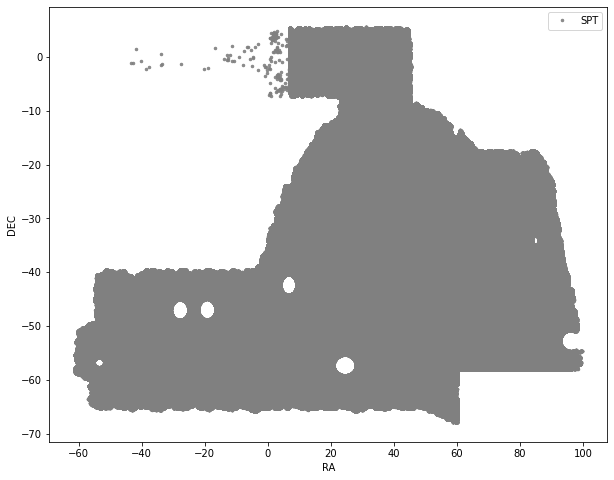

In [27]:
# spt footprint using pandas (and numpy)
spatialcheck([gold_spt_pd], 
             label = ['SPT'], convert = None, ratag='RA',dectag='DEC')

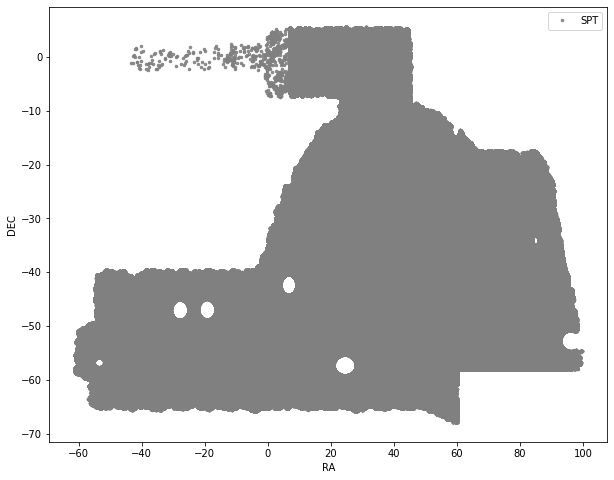

In [13]:
# recheck spt footprint using numpy
spatialcheck([gold_spt_chron], 
             label = ['SPT'], convert = None, ratag='RA',dectag='DEC')

# check magnitudes
# add cut of >-10 to look at only st82 region
# plot histograms

In [27]:
# save gold_spt as fits file:

outdir = '../output/test/train_cat/y3/'
os.makedirs(outdir, exist_ok=True)
esutil.io.write( outdir+'gold_spt.fits', gold_spt, overwrite=True)

In [28]:
# clear the memory of gold_st82 and full gold catalog here

gold = []
gold_st82 = []